# KNN算法的实现

In [9]:
# 向量版本：使用numpy的矩阵运算与向量（使用内存块的操作技术，）
import numpy as np
import sklearn.datasets as ds

def knn(train_data, train_label, sample,  k):
    
    # 计算待分类的样本到所有训练样本的距离
    diff = ((sample - train_data)**2).sum(axis =1 )
    distances = np.sqrt(diff)   # 每个距离索引对应样本的位置
    #  print(distances)
    # 排序
    sorted_index = distances.argsort()   # 从小到大
    # 取k个最小的,顺便统计每个类的统计数量
    categories = {}  # key=类别，value=所在类别的统计量
    for i in range(k):
        # 取类别
        category = train_label[sorted_index[i]]
        categories[category] = categories.get(category, 0) + 1  # 编程技巧
    # print(categories)
    # 统计k中样本所在类别的数量，数量最大的就是分类
    # 对字典categories按照值排序，取出一个的key就是类别
    sorted_categories = sorted(categories.items(),  key=lambda x: x[1], reverse=True)  # 排序返回列表
    
    return sorted_categories[0][0]


data, target = ds.load_iris(return_X_y=True)
c = knn(data, target, data[50], 20)
c

1

# KNN中k的选择

- 一般选择比较小的k。k选择比较小是指样本少。

- 通过程序，从1-n（n是样本容量）选择k，分析它的识别率。
    - 选择识别率比较高的k

- 参数选择：
    - 参数的调优：很多算法的参数都是用户决定。
        1. 懂算法，预估处参数的范围。
        2. 一般采用交叉验证的方式，寻找最优参数。
            - 样本分成两个部分：A：训练集，B：测试集
                - A,B的切分有很多切分方法。
            - 对两个部分训练与测试反复多次（训练与测试比较均匀）。 
            
            - 结果：
                - 累加和最好的作为选优的结果
                - 平均值最好的作为选优的结果

13


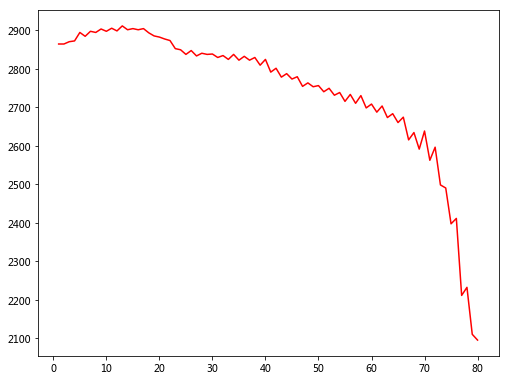

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection  import KFold, ShuffleSplit

K = 120
#  对训练数据集进行切分：随机切分，K折切分。（5个交叉验证数据集）
ss = ShuffleSplit(n_splits=100, test_size=0.2)
data, target = ds.load_iris(return_X_y=True)
result_split = ss.split(data)

# 定义字典用来保存，每个k的测试效果的累加
k_rate = {}
# 对交叉的雅正数据集循环训练，并测试，累加测试正确识别数量（可能是时间）。
for idx_train,  idx_test in result_split:
    # 根据下标获取训练与测试数据集
    data_train = data.take(idx_train, axis=0)     # 训练集
    target_train = target.take(idx_train, axis=0) # 训练标签
    
    data_test = data.take(idx_test, axis=0)    # 测试集
    target_test = target.take(idx_test, axis=0)   # 测试标签
    # 对测试集循环测试
    for  idx in  idx_test:
        sample = data[idx]   # 取出测试样本
        # 在[1，n]中取一个数m，（n样本数量），循环mc次，来训练与测试
        for  k in range(1, K+1):   # 采用不同的k对一个样本训练，用于比较k的测试结果
            c = knn(data_train, target_train, sample, k)     # 类别
            if c == target[idx]:
                k_rate[k] = k_rate.get(k, 0) + 1 
    
# 得到准确数最多的k就是最优的k。
k_rate_sorted = sorted(k_rate.items(), key=lambda x : x[1], reverse=True)
# 可以使用可视化选择最优（模型分析可视化，用户数据可视化）。
# k_rate
best_k = k_rate_sorted[0][0]
print(best_k)
# k的选择与识别正确数的可视化
figure = plt.figure('K调优',  figsize=(8, 6))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])

# 对统计的结果按照k排序
dict_sorted = dict(sorted(k_rate.items(), key=lambda x: x[0], reverse=False))

ax.plot(dict_sorted.keys(), dict_sorted.values(), color=(1,0,0,1))

plt.show()


# sklearn的KNN算法应用

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import sklearn.datasets as ds
from sklearn.model_selection  import KFold, ShuffleSplit




ss = ShuffleSplit(n_splits=5, test_size=0.2)
data, target = ds.load_iris(return_X_y=True)
result_split = ss.split(data)


for idx_train,  idx_test in result_split:
    # 根据下标获取训练与测试数据集
    data_train = data.take(idx_train, axis=0)     # 训练集
    target_train = target.take(idx_train, axis=0) # 训练标签
    
    data_test = data.take(idx_test, axis=0)    # 测试集
    target_test = target.take(idx_test, axis=0)   # 测试标签
    
    classifier = KNeighborsClassifier(n_neighbors=10)
    # 训练
    classifier.fit(data_train, target_train) 
    # 识别
    pre = classifier.predict(data_test)
    correct_num = (pre ==target_test).sum()
    # 打印结果
    print(F'测试样本总数：{len(target_test)}，识别正确数：{correct_num}，识别正确率：{100.0* correct_num/len(target_test):6.2f}%')
    
    


测试样本总数：30，识别正确数：29，识别正确率： 96.67%
测试样本总数：30，识别正确数：28，识别正确率： 93.33%
测试样本总数：30，识别正确数：28，识别正确率： 93.33%
测试样本总数：30，识别正确数：28，识别正确率： 93.33%
测试样本总数：30，识别正确数：28，识别正确率： 93.33%
